## Fashion MNIST

#### Analizaremos un dataset de fashion MNIST con un clasificador Gaussiano

#### Imports

In [1]:
import math
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

Obtenemos el dataset de sklearn

In [2]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

Para darnos un primer vistazo de lo que tenemos, veamos que dimensión tiene el dataset, teniendo en cuenta que contiene imagenes de 28x28

In [3]:
print(X.shape)

(70000, 784)


Observamos que contiene 70000 imágenes, las cuales se encuentran en formato de arreglo de 784 valores.

Realizaremos un reshape para llevar las imágenes a dos vectores, (fila,columna) de 28x28. E intentaremos visualizar una de estas imágenes una vez visto el formato que posee.

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 207. 178. 107. 156. 161. 109.  64.  23.  77. 1

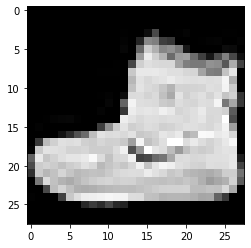

In [4]:
X = X.reshape(70000,28,28)
# Veamos como se presenta la información de cada pixel
print(X[0])
# Si la ploteamos con cmap gray veremos que pareciera ser un sneaker
plt.imshow(X[0], cmap="gray")
plt.show()

Lo siguiente que haremos es ver el vector 'y' que contiene cada clase y mapear en un label_dict, para uso nuestro, nombre con número del vector Y para cada clase

In [5]:
# Si observamos las clases exraidas del dataset
print(y)
# Podemos asignar entonces un diccionario para nombrar cada una
label_dict = {
                '0':'T-shirt/top',
                '1':'Trouser',
                '2':'Pullover',
                '3':'Dress',
                '4':'Coat',
                '5':'Sandal',
                '6':'Shirt',
                '7':'Sneaker',
                '8':'Bag',
                '9':'Ankle boot'
            }

['9' '0' '0' ... '8' '1' '5']


Una pregunta que nos hacemos ahora es si el dataset esta balanceado:

In [6]:
pd.Series(y).value_counts()

0    7000
5    7000
6    7000
4    7000
2    7000
8    7000
3    7000
7    7000
9    7000
1    7000
dtype: int64

Se puede observar que el dataset esta perfectamente balanceado con 7000 imágenes para cada una de las 10 clases

### Plots

Realizaremos el plot de las primeras 150 imágenes en formato de grilla y también graficaremos las primeras 100 imágenes de cada clase.

In [7]:
def create_row(img, n):
    concatenated = img[n[0]]
    n = n[1:]
    for i in n:
        concatenated = np.concatenate((concatenated, img[i]), 1)
    return concatenated
        
def plot_images(data, N, columns=10, figsize=(20,5)):
    plt.figure(figsize=figsize)
    N = np.array(N)
    N = N.reshape(-1, columns)
    concatenated = create_row(data, N[0])
    N = N[1:,:]
    for row in N:
        concatenated = np.concatenate((concatenated, create_row(data, row)))
    plt.imshow(concatenated, cmap="gray")
    plt.show()

Podemos observar imagenes que se contrastan con las clases mencionadas anteriormente

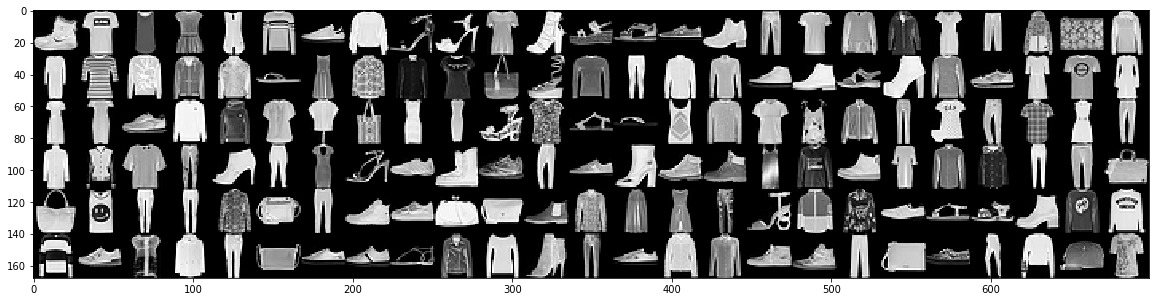

In [8]:
plot_images(X, range(150), columns=25)

Ahora veamos las 100 primeras imágenes para cada tipo en particular.

Primeras 100 imagenes de la clase T-shirt/top:


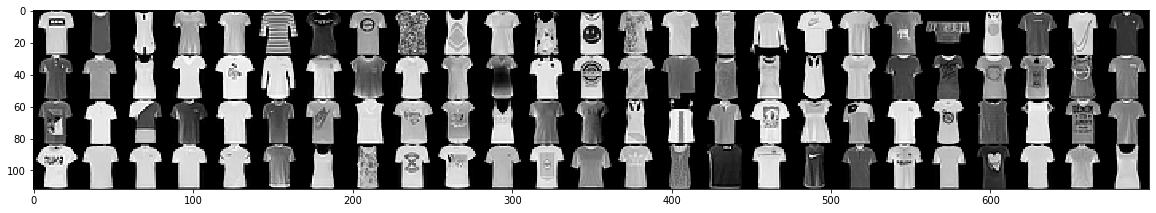

Primeras 100 imagenes de la clase Trouser:


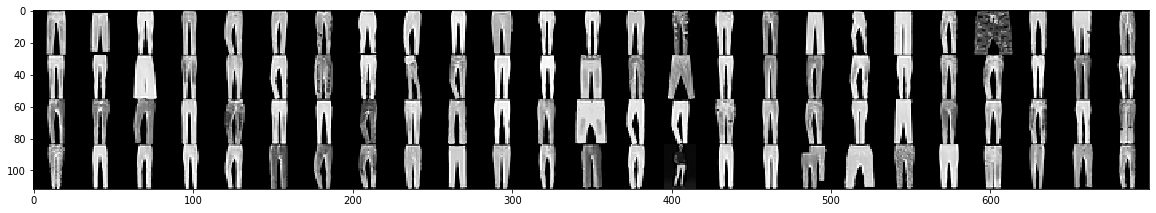

Primeras 100 imagenes de la clase Pullover:


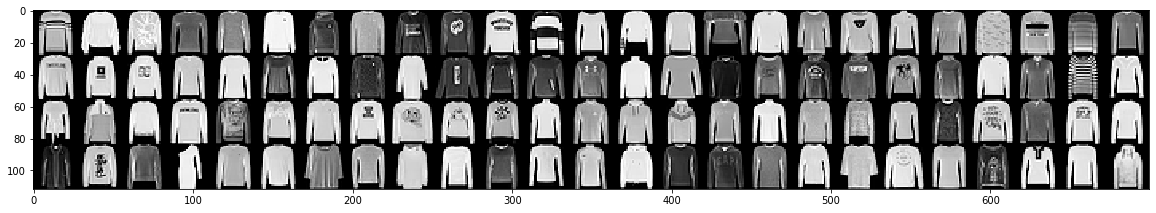

Primeras 100 imagenes de la clase Dress:


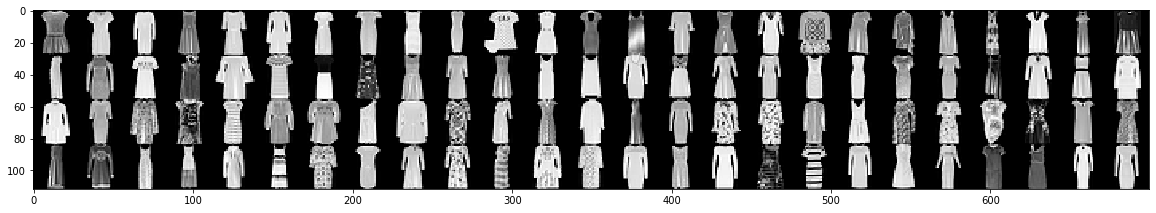

Primeras 100 imagenes de la clase Coat:


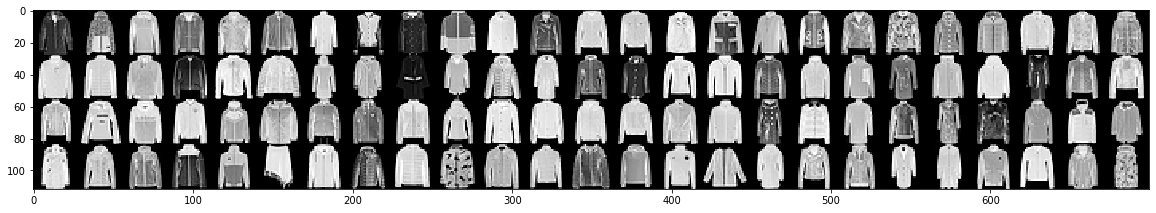

Primeras 100 imagenes de la clase Sandal:


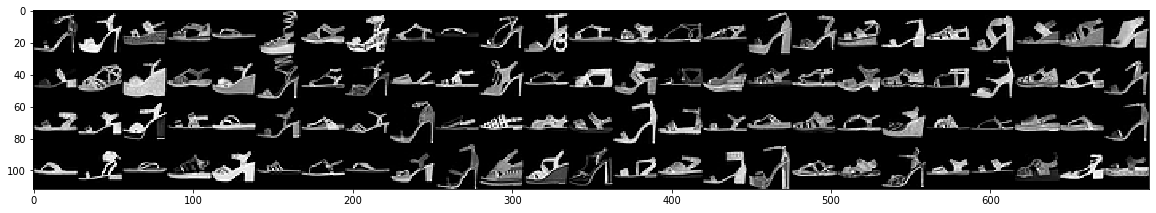

Primeras 100 imagenes de la clase Shirt:


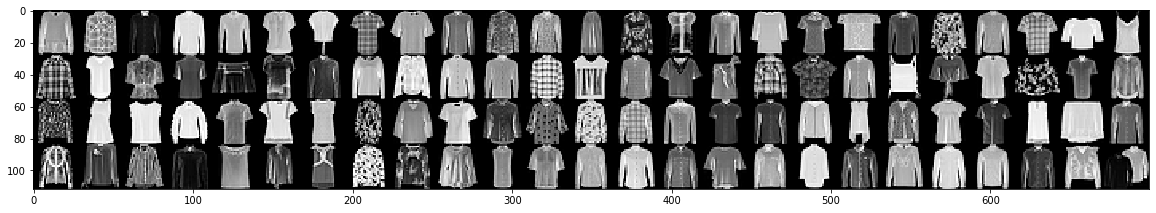

Primeras 100 imagenes de la clase Sneaker:


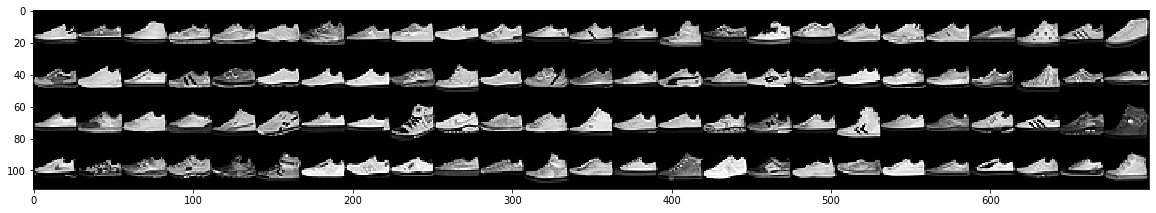

Primeras 100 imagenes de la clase Bag:


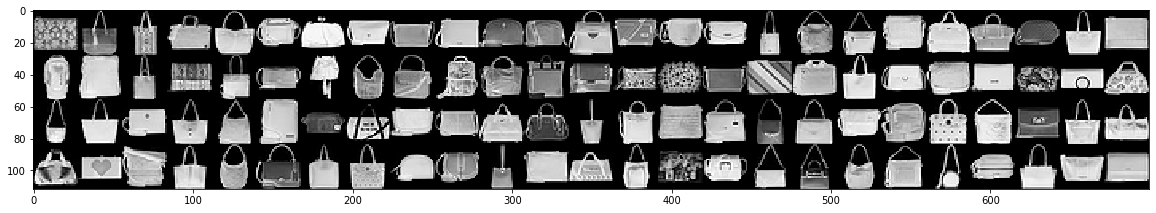

Primeras 100 imagenes de la clase Ankle boot:


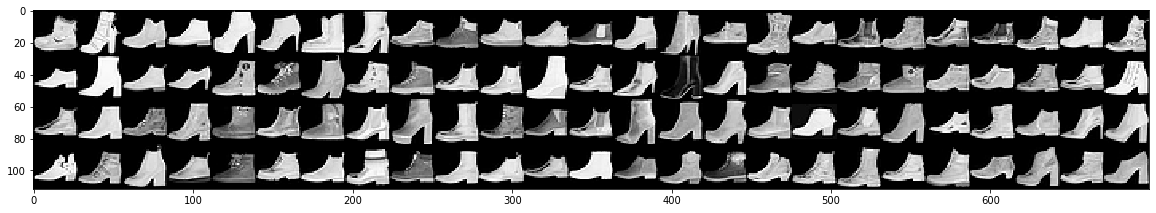

In [9]:
first100 = {}
for clase in label_dict.keys():
    first100[clase] = []
    for i in range(len(y)):
        if clase == y[i]:
            first100[clase].append(X[i])
        if len(first100[clase]) == 100:
            break;
    print(f"Primeras {len(first100[clase])} imagenes de la clase {label_dict[clase]}:")
    plot_images(first100[clase], range(100), columns=25)


## División de Datos
Realizaremos una división de train val y test de 5 1 1. Luego veremos cuantas fotos fueron a parar para cada uno de los grupos.

In [10]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size=1/7, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=1/6, random_state=42, stratify=y_train_and_val)

print(f"Total in train: {X_train.shape[0]}")
print(f"Total in val: {X_val.shape[0]}")
print(f"Total in test: {X_test.shape[0]}")

Total in train: 50000
Total in val: 10000
Total in test: 10000


Queremos chequear stratificación o balanceamiento:

In [11]:
print("Balance de clases para train:\n") 
print(pd.Series(y_train).value_counts(normalize=True))

print("\nBalance de clases para validation:\n") 
print(pd.Series(y_val).value_counts(normalize=True))

print("\nBalance de clases para test:\n") 
print(pd.Series(y_test).value_counts(normalize=True) )

Balance de clases para train:

0    0.1
5    0.1
6    0.1
4    0.1
2    0.1
8    0.1
3    0.1
7    0.1
9    0.1
1    0.1
dtype: float64

Balance de clases para validation:

9    0.1
8    0.1
0    0.1
1    0.1
5    0.1
4    0.1
6    0.1
2    0.1
3    0.1
7    0.1
dtype: float64

Balance de clases para test:

9    0.1
8    0.1
0    0.1
1    0.1
5    0.1
4    0.1
6    0.1
2    0.1
3    0.1
7    0.1
dtype: float64


Podemos obervar que efectivamente todos los grupos de datos tiene la misma proporción de cada una de las clases.

## Naive Bayes Gaussiano

Si modelamos cada pixel como una variable aleatoria continua cuyo dominio va de 0 a 255, para formar una imagen de 28x28 se deben tomar 784 gauseanas

Para calculo de un likelihood p(x = v/ y=1), estaríamos hablando de la probabilidad de que para la clase trouser se de una imágen caracterizada por el vector de (28, 28) v = [0, .....,0] (por ejemplo). Para el cálculo perfecto de todos los likelihoods se deberían calcular para cada combinación de intensidad de pixeles en el vector, dado que cada pixel puede tomar 255 valores.

De todas maneras si tomamos independencia entre pixeles, podemos asumir que el likelihood se puede calcular como el producto de que cada pixel pertenezca a la clase, es decir p(X/y) = p(X(0,0)/y)p(X(0,1)/y)....p(X(28,28)/y) dejandonos con un naive bayes

Debemos entonces calcular el likelihood de cada pixel

Si tomamos el valor de 0 a 255 como continuo, podemos modelar la distribución de 0 a 255 como una Gaussiana. El probelma, entonces, se reduce a encontrar para cada clase la distribución de cada pixel, o lo que es equivalente, su media y su varianza

Un ejemplo de esto seria tomar para el pixel de la posicion 10,10 , tomar todos los valores de ese pixel para todas las imágenes de una cierta clase, y encontrar la media y el desvío, lo que define por completo una gaussiana para ese pixel y esa clase. Realizaremos lo siguiente para la clase Trouser a partir del set de train

In [12]:
inverse_label = {v: k for k, v in label_dict.items()} # Invierto mi diccionario de labels
print(str(inverse_label) + '\n')
trouser_i = inverse_label['Trouser']
print('Index: ' + str(trouser_i) + '\n')
trouser_10_10 = X_train[y_train==trouser_i, 10, 10] # Obtengo cada valor de cada pixel 10,10 para mi clase trouser
print(str(trouser_10_10.shape) + '\n')  # Cuantos pixeles 10 10 tengo daod que mi clase es trouser
mu_trouser_10_10 = np.mean(trouser_10_10)
sigma_trouser_10_10 = np.std(trouser_10_10)
print("Para la clase Trouser, el pixel en la posicion (10,10) tiene una distribución caracterizada por...\n")
print(f"Media: {mu_trouser_10_10}. Desvío estandard: {sigma_trouser_10_10}\n")

{'T-shirt/top': '0', 'Trouser': '1', 'Pullover': '2', 'Dress': '3', 'Coat': '4', 'Sandal': '5', 'Shirt': '6', 'Sneaker': '7', 'Bag': '8', 'Ankle boot': '9'}

Index: 1

(5000,)

Para la clase Trouser, el pixel en la posicion (10,10) tiene una distribución caracterizada por...

Media: 184.1972. Desvío estandard: 58.04584319449585



Comparemos la distribución normal para el pixel 10 10 de la clase Trouser y la clase Pullover

In [13]:
pullover_i = inverse_label['Pullover']
pullover_10_10 = X_train[y_train==pullover_i, 10, 10] # Obtengo cada valor de cada pixel 10,10 para mi clase trouser
mu_pullover_10_10 = np.mean(pullover_10_10)
sigma_pullover_10_10 = np.std(pullover_10_10)

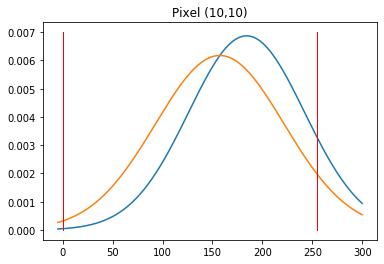

In [14]:
x = np.linspace(-5, 300, 10000)
plt.plot(x, stats.norm.pdf(x, mu_trouser_10_10, sigma_trouser_10_10))
plt.plot(x, stats.norm.pdf(x, mu_pullover_10_10, sigma_pullover_10_10))

plt.plot(np.zeros(10), np.linspace(0, 0.007, 10), color='red', lw=1)
plt.plot(255*np.ones(10), np.linspace(0, 0.007, 10), color='red', lw=1)

plt.title('Pixel (10,10)')
plt.show()

Se puede obesrvar que para el mismo pixel, la probabilidad de encontrar un nivel de gris cualquiera es distinto si estamos situados en la clase Trouser o en la clase Pullover

Ahora, busquemos el desvío estandar y la media del pixel 14,14 para la clase Bag.

In [15]:
bag_i = inverse_label['Bag']
bag_14_14 = X_train[y_train==bag_i, 14, 14]   #de train solo voy a tener las imagenes que perteneces a trouser
mu_bag_14_14 = np.mean(bag_14_14)
sigma_bag_14_14 = np.std(bag_14_14)
print("Para la clase Bag, el pixel en la posicion (14,14) tiene una distribución caracterizada por...\n")
print(f"Media: {mu_bag_14_14}. Desvío estandar: {sigma_bag_14_14}\n")

Para la clase Bag, el pixel en la posicion (14,14) tiene una distribución caracterizada por...

Media: 159.3294. Desvío estandar: 63.31644095841143



Ahora realizaremos una matriz con la media y el desvío estandar para cada pixel de cada clase. Sus dimensiones serán consecuentemente de 2x784x10, donde tendremos, para cada clase y para cada pixel (28x28 o 784), ambos parámetros

In [16]:
matriz_de_parametros = []
for clase in inverse_label.values():
    pixels_clase = []
    for i in range(28):
        for j in range(28):
            bag_i_j = X_train[y_train==clase, i, j]
            mu_bag_i_j = np.mean(bag_i_j)
            sigma_bag_i_j = np.std(bag_i_j)
            pixels_clase.append([mu_bag_i_j, sigma_bag_i_j])

    matriz_de_parametros.append(pixels_clase)

print(list(inverse_label.values()))
print(f"Por ejemplo, para la clase 0 y el pixel 4,4 tenemos: {matriz_de_parametros[0][16]}")


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Por ejemplo, para la clase 0 y el pixel 4,4 tenemos: [77.8638, 73.08333906958548]


Realizaremos una función que nos permita graficar como lo veníamos haciendo antes

In [17]:
def gaussean_plot(mu, sigma, x):
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.plot(np.zeros(10), np.linspace(0, 0.007, 10), color='red', lw=1)
    plt.plot(255*np.ones(10), np.linspace(0, 0.007, 10), color='red', lw=1)
    plt.show()

Con esta función, y aprovechandonos de la matriz, grafiquemos las distribuciones de cada clase para el pixel 10,10

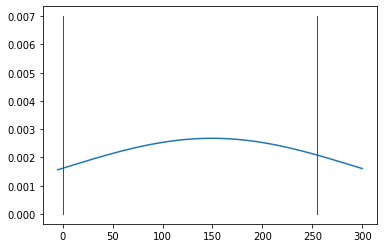

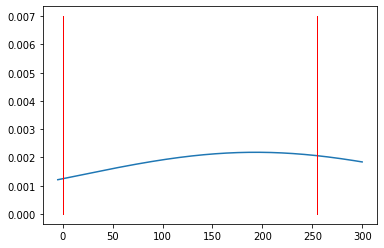

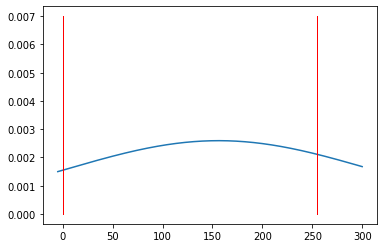

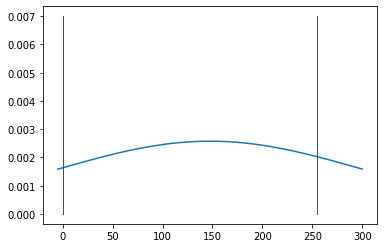

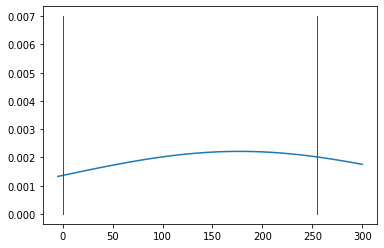

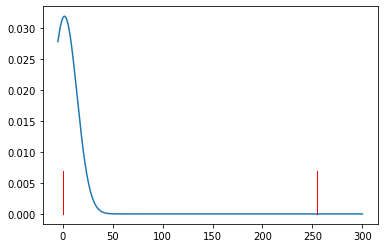

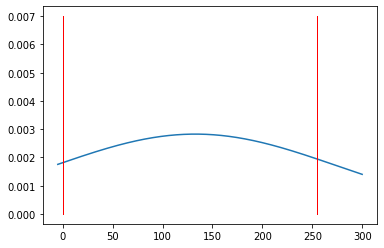

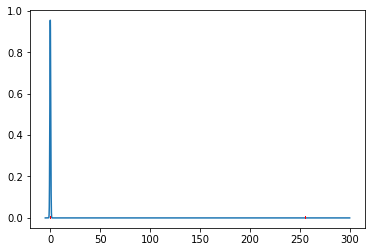

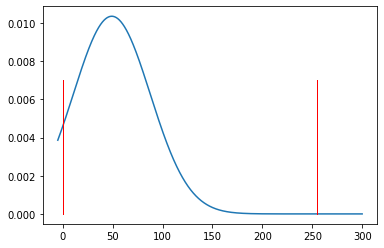

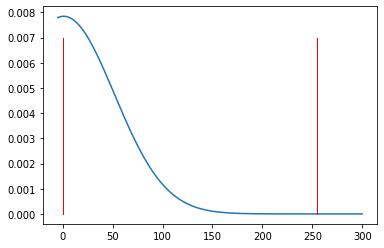

In [18]:
x = np.linspace(-5, 300, 10000)
for clase in list(inverse_label.values()):
    gaussean_plot(matriz_de_parametros[int(clase)][122][0], matriz_de_parametros[int(clase)][100][0], x)

Otra cuenta que se puede realizar, es el cálculo del likelihood de que en Trouser, un valor de gris 145 caiga en el pixel 10,10:

In [19]:
stats.norm.pdf(145, mu_trouser_10_10, sigma_trouser_10_10)

0.005471660161146977

Se puede ver que la probabilidad a priori de cada una de las clases es de 0.1 al ver que cada clase contiene 5000 imágenes de un total de 50000, siendo 10 clases.

La probabilidad a psoteriori no normalizada de que un valor de 145, observado en el pixel (10, 10) pertenezca a un imágen de Trouser queda definido como:

In [20]:
stats.norm.pdf(145, mu_trouser_10_10, sigma_trouser_10_10)*0.1

0.0005471660161146978

A continuación buscaremos la clase que tenga mayor likelihood a que se presente un valor de 145 en el pixel 10,10

In [21]:
most_likely = ''
most_likelihood = 0
for clase in inverse_label.values():
    class_10_10 = X_train[y_train==clase, 10, 10]
    mu_class_10_10 = np.mean(class_10_10)
    sigma_class_10_10 = np.std(class_10_10)
    likelihood = stats.norm.pdf(145, mu_class_10_10, sigma_class_10_10)
    if likelihood > most_likelihood:
        most_likely = clase
        most_likelihood = likelihood
        
print(label_dict[most_likely])

Coat


Ajustaremos un modelo de NB gaussiano a los datos de train. Probaremos ajustar el hiperparámetro de smoothing. Considerando el accuracy promedio entre clases, veremos cual es el mejor accuracy que se obtuvo en validacion y con que valor de smoothing se obtuvo.

In [22]:
var_smoothings = [1, 1e-1,1e-7, 1e-5, 1e-3 ]

In [23]:
# linealizo los vectores para pasarselos a gaussean NB
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
pred = 0
best_vs = var_smoothings[0]
for vs in var_smoothings:
    gaussian = GaussianNB(var_smoothing = vs)
    gaussian.fit(X_train, y_train)
    y_pred_val = gaussian.predict(X_val)
    mean_accuracy = accuracy_score(y_val, y_pred_val)
    if(mean_accuracy > pred):
        best_vs = vs
        pred = mean_accuracy
        
print(best_vs)
print(pred)

0.1
0.672


Se observa arriba como el mejor smoothing, nos dio un valor de predicción para validación

Chequeemos el accuracy resultante del mejor valor de hiperparámetro

In [24]:
gaussian = GaussianNB(var_smoothing = 0.1)
gaussian.fit(X_train, y_train)
y_pred_test = gaussian.predict(X_test)
mean_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {mean_accuracy}")

Accuracy: 0.6708


## Agrupar Pixeles Como Hiperparámetro

En esta seccion, buscaremos agrupar pixeles de 4 en 4. La manera en que se realizará esto, es dividiendo una imagen de 28x28 en 4 de 14x14, colocando los pixeles a agrupar, uno en cada imágen. Es decir, el pixel 0,0 ira a parar al 0,0 de la imágen 1, el pixel 0,1 ira a parar al 0,0 de la imágen 2, el pixel 1,0 ira a parar al 0,0 de la imágen 3 y el pixel 1,1 ira a parar al 0,0 de la imágen 4.

Habiendo realizado esto, luego pasaremos las imágenes de 14x14 a imágenes de 28x28 nuevamente. Esto se hace para entrenar al modelo con imágenes siempre de 28x28 y que su clasificación siempre se base en ese formato de fotos.

Para hacer lo mencionado, se utilizará redundancia de píxeles, es decir, para una imágen de 14x14, tomemos como ejemplo la imágen 2, el 0,0 pasará a estar en 0,0 0,1 1,0 1,1 de la nueva imágen de 28x28.

Una vez transformadas todas las imágenes nuevamente a 28x28, se esperará tener 200mil imágenes, teniendo en cuenta que partimos de un original de 50 mil imágenes de 28x28. Al buscar la varianza y desvío para el pixel, por ejemplo, 0,0 para una cierta clase, habremos logrado incluir 4 pixeles donde antes había uno solo.

Con esta nueva información, y manteniendo un formato correcto del vector y, que ahora tendrá dimension 200 mil, entrenaremos el modelo

Comencemos observando las dimensiones del vector de train el cual se utilizó para entrenar el modelo con el módulo de sklearn

In [25]:
print(X_train.shape)

(50000, 784)


El modelo de sklearn necesita un solo vector para realizar el entrenamiento, es decir, si tenemos un arreglo de 50 mil posiciones, donde cada pocisión contiene dos arreglos para caracterizar una matriz de 28x28, debemos pasarlo a un único vector de 50 mil x 28 x 28.

En lo que va de nuestro análisis para esta sección, nos es de mucha útilidad contar con los datos en un formato amigable, como vendría a ser el de 50 mil posiciones con arreglos de 28x28. En el siguiente bloque, se verá que se realiza un reshape para asegurar esto.

Veremos que en X_grouped_train guardaremos todas las imágenes de 14x14

In [26]:
N = 4
X_group_train = X_train.reshape(50000,28,28)
X_grouped_train = []
for i in range(len(X_group_train)):
    # voy hasta 50 mil recorriendo por cada imagen
    img = X_group_train[i]
    img1 = []
    img2 = []
    img3 = []
    img4 = []
    k = 0
    while(k<28):
        w = 0
        while(w<28):
            pixel1 = img[k][w]
            img1.append(pixel1)
            pixel2 = img[k+1][w]
            img2.append(pixel2)
            pixel3 = img[k][w+1]
            img3.append(pixel3)
            pixel4 = img[k+1][w+1]
            img4.append(pixel4)
            w += 2
        k += 2
    
    X_grouped_train.append(img1)
    X_grouped_train.append(img2)
    X_grouped_train.append(img3)
    X_grouped_train.append(img4)

Observemos como queda nuestro arreglo de imágenes de 14x14

In [27]:
X_grouped_train = np.array(X_grouped_train)
print(X_grouped_train.shape)

(200000, 196)


Podemos ver que tenemos 200mil posiciones, como lo esperaríamos partiendo de 50 mil imágenes (ya que 50 mil x 4 = 200 mil) en donde en cada posición vemos que las imágenes quedan conformadas por un único arreglo de 196 valores. Para rtabajar con nuestra nueva data, harémos un reshape de estos 196 valores a filas y columnas de 14x14.

In [28]:
new_data = X_grouped_train.reshape(200000,14,14)
print(new_data[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 167. 136. 113. 222. 173. 141. 117.  76.]
 [  0.   0.   0.   0.   2.   0. 225. 203. 198. 198. 178. 193. 182. 165.]
 [  0.   0.   0.   0.   6.  13. 178. 199. 193. 226. 214. 234. 201. 196.]
 [  0.   0.   0.   0.   4.   0. 233. 208. 244. 177. 136.  59.  96. 183.]
 [  0.   0.   0.   0.   2.   0. 203. 231. 240. 234. 191. 172. 186. 157.]
 [  0.   0.   0.   3.   0. 102. 216. 224. 218. 223. 223. 218. 217. 214.]
 [  1.   0.   0.   0. 170. 218. 225. 225. 223. 218. 218. 220. 209. 234.]
 [  0. 187. 184. 196. 205. 184. 236. 220. 219. 207. 209. 207. 209. 234.]
 [141. 206. 219. 220. 205. 212. 193. 221. 218. 218. 225. 218. 220. 233.]
 [  8. 199. 211. 194. 190. 183. 187. 181. 181. 186. 190. 193. 197. 207.]
 [  0.   0.   0.  68. 132. 132. 137. 119. 114. 128. 131. 136. 111.   7.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

Vemos como haciendo un reshape nos queda la siguiente estructura para la foto numero 1. Nos quedan estructuras similares para cada una de las 200 mil fotos.

A continuación procedemos a ver que es lo que observariamos si realizaramos un plot de la foto 1. Compararemos este plot con la foto 1 del set sin modificaciones

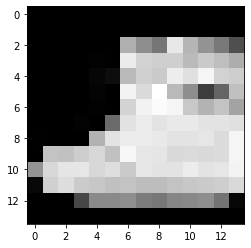

In [29]:
plt.imshow(new_data[0], cmap="gray")
plt.show()

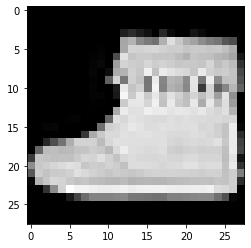

In [30]:
plt.imshow(X_group_train[0], cmap="gray")
plt.show()

Se puede observar como la imagen perdio calidad al pasarla a una de 14x14. Esto es de esperarse e indica que el procesamiento que hicimos hasta ahora tiene sentido. Si uno se pone a pensarlo, estamos sacándole 3 pixeles de definición a cada foto original, lo que hace que pierda la calidad de la imágen.

Continuaremos con el resize ahora de cada imágen para voler a imágenes de 28x28

In [31]:
new_data_in_28 = []
for i in range(len(new_data)):
    # voy hasta 200 mil recorriendo por cada imagen
    old_image = new_data[i]
    new_image = np.zeros((28,28))
    if i%999 == 0:
        print(f"Procesado... {int(i*100/len(new_data))}%")
    k = 0
    p = 0
    while(k<14):
        w = 0
        j = 0
        while(w<14):
            new_image[p][j] = old_image[k][w]
            new_image[p+1][j] = old_image[k][w]
            new_image[p][j+1] = old_image[k][w]
            new_image[p+1][j+1] = old_image[k][w]
            j += 2
            w += 1
        p += 2
        k += 1
    new_data_in_28.append(new_image)

Procesado... 0%
Procesado... 0%
Procesado... 0%
Procesado... 1%
Procesado... 1%
Procesado... 2%
Procesado... 2%
Procesado... 3%
Procesado... 3%
Procesado... 4%
Procesado... 4%
Procesado... 5%
Procesado... 5%
Procesado... 6%
Procesado... 6%
Procesado... 7%
Procesado... 7%
Procesado... 8%
Procesado... 8%
Procesado... 9%
Procesado... 9%
Procesado... 10%
Procesado... 10%
Procesado... 11%
Procesado... 11%
Procesado... 12%
Procesado... 12%
Procesado... 13%
Procesado... 13%
Procesado... 14%
Procesado... 14%
Procesado... 15%
Procesado... 15%
Procesado... 16%
Procesado... 16%
Procesado... 17%
Procesado... 17%
Procesado... 18%
Procesado... 18%
Procesado... 19%
Procesado... 19%
Procesado... 20%
Procesado... 20%
Procesado... 21%
Procesado... 21%
Procesado... 22%
Procesado... 22%
Procesado... 23%
Procesado... 23%
Procesado... 24%
Procesado... 24%
Procesado... 25%
Procesado... 25%
Procesado... 26%
Procesado... 26%
Procesado... 27%
Procesado... 27%
Procesado... 28%
Procesado... 28%
Procesado... 29%
P

En este momento, contamos con un vector de 200 mil imágenes de 28x28, o eso esperaríamos. Para verificar, haremos un shape de nuestro vector, esperando encontrar estas características

In [32]:
new_data_in_28 = np.array(new_data_in_28)
print(new_data_in_28.shape)

(200000, 28, 28)


Podemos observar que el arreglo de imagene cumple con lo esperado. Tomemos ahora la imagen 0 para ver como quedó.

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 167. 167.
  136. 136. 113. 113. 222. 222. 173. 173. 141. 141. 117. 117.  76.  76.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 167. 167.
  136. 136. 113. 113. 222. 222. 173. 173. 141. 141. 117. 117.  76.  76.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   0.   0. 225. 225.
  203. 203. 198. 198. 198. 198. 178. 178. 193. 193. 182. 1

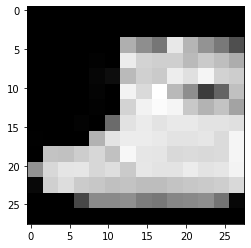

In [33]:
print(new_data_in_28[0])
plt.imshow(new_data_in_28[0], cmap="gray")
plt.show()

Podemos ver que obtenemos una imágen con una forma que esperaríamos, y con una caidad similar a las de 14x14, pareciendo tener alguna deformación. Que la calidad de la imagen no mejore tiene sentido, ya que no se esta agregando informacion adicional a la que se perdió al llevar las imagenes a 14x14. La deformación se atribuye a que estamos colocando 4 pixeles iguales en donde en nuestra foto original de 28x28 iban 4 pixeles distintos

Por último redefiniremos el vector y. Es de esperarse que si cuadruplicamos las imagenes, tengamos que cuadruplicar el vector de clase. Es decir, ahora en nuestro vector de imagenes la foto de una bota aparecera 4 veces seguidas, por lo que el indice del vector y debe acompañarlo

In [34]:
y_new_data_in_28 = []
for i in range(len(y_train)):
    y_new_data_in_28.extend([y_train[i]]*4)

y_new_data_in_28 = np.array(y_new_data_in_28)
print(y_new_data_in_28.shape)
print(y_new_data_in_28)

(200000,)
['9' '9' '9' ... '1' '1' '1']


Probemos nuestro nuevo modelo con 0.1 de var_smoothing a ver que resultado nos arroja

In [35]:
new_data_in_28 = new_data_in_28.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
gaussian = GaussianNB(var_smoothing = 0.1)
gaussian.fit(new_data_in_28, y_new_data_in_28)
y_pred_test = gaussian.predict(X_test)
mean_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy {mean_accuracy}")

Accuracy 0.639


Se puede ver que no mejoró la clasificación de imagenes. Esto puede pasar, uno busca otros metodos para ver si la el clasificador puede estimar mejor pero a veces esto no sucede. Hay que buscar otro mecanismo o ajustar el actual para probar de obtener un resultado mejor.